In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_11796/463198658.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data Preparation

In [3]:
df = pd.read_csv("../dataset/HousingData.csv")

In [4]:
scaler = MinMaxScaler()
df_normalized= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Menampilkan statistik ringkasan data setelah normalisasi
print("\nStatistik ringkasan setelah normalisasi:\n")
display(df_normalized.describe())


Statistik ringkasan setelah normalisasi:



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,0.040526,0.112119,0.389443,0.069959,0.349167,0.521869,0.675783,0.242381,0.371713,0.422208,0.622929,0.898568,0.303130,0.389618
std,0.098013,0.233889,0.250583,0.255340,0.238431,0.134627,0.288357,0.191482,0.378576,0.321636,0.230313,0.230205,0.197458,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000850,0.000000,0.173387,0.000000,0.131687,0.445392,0.435376,0.088259,0.130435,0.175573,0.510638,0.945730,0.148869,0.267222
50%,0.002781,0.000000,0.338343,0.000000,0.314815,0.507281,0.761071,0.188949,0.173913,0.272901,0.686170,0.986232,0.267660,0.360000
75%,0.039945,0.125000,0.646628,0.000000,0.491770,0.586798,0.937951,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Cleaning

In [5]:
display(df_normalized[["LSTAT","MEDV","RM","DIS"]].isnull().sum())

LSTAT    20
MEDV      0
RM        0
DIS       0
dtype: int64

In [6]:
df_normalized['LSTAT'] = df_normalized['LSTAT'].fillna(df_normalized['LSTAT'].mean())

In [7]:
display(df_normalized[["LSTAT","MEDV","RM","DIS"]].isnull().sum())

LSTAT    0
MEDV     0
RM       0
DIS      0
dtype: int64

In [8]:
X1 = df_normalized["LSTAT"]
X2 = df_normalized["DIS"]
X3 = df_normalized["RM"]
Y = df_normalized["MEDV"]

In [15]:
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'Y': Y})

# Add polynomial features
data['X1_sq'] = data['X1'] ** 2
data['X2_sq'] = data['X2'] ** 2
data['X3_sq'] = data['X3'] ** 2
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


,X1,X2,X3,Y,X1_sq,X2_sq,X3_sq
477,0.639625,0.088307,0.333972,0.155556,0.409120,0.007798,0.111537
15,0.185982,0.306359,0.435524,0.331111,0.034589,0.093856,0.189681
332,0.168322,0.501150,0.473271,0.320000,0.028332,0.251152,0.223985
423,0.594923,0.081132,0.487066,0.186667,0.353933,0.006582,0.237234
19,0.263521,0.242514,0.415022,0.293333,0.069443,0.058813,0.172243
...,...,...,...,...,...,...,...
106,0.467163,0.098337,0.435907,0.322222,0.218242,0.009670,0.190015
270,0.310982,0.300030,0.439739,0.357778,0.096710,0.090018,0.193371
348,0.117550,0.656039,0.589002,0.433333,0.013818,0.430388,0.346923
435,0.594371,0.090489,0.587852,0.186667,0.353277,0.008188,0.345570


# Melatih Model

In [10]:

model_fit = sm.OLS.from_formula("Y ~ X1 + np.power(X1, 2) + X2 + np.power(X2, 2) + X3 + np.power(X3, 2)", data=train_data).fit()

/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_11796/1313488062.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X3_surf = model_fit.params[0] + model_fit.params[1]*X1_surf + model_fit.params[2]*X2_surf + model_fit.params[3]*(X1_surf**2) + model_fit.params[4]*(X2_surf**2)


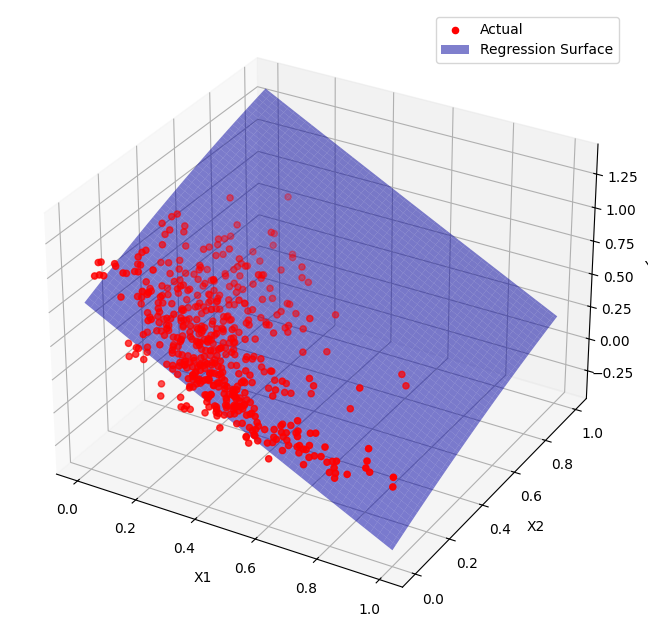

In [12]:

# Visualize the model_fit
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the actual data
ax.scatter(data['X1'], data['X2'], data['Y'], color='red', label='Actual')

# Create meshgrid for surface plot
X1_surf, X2_surf = np.meshgrid(np.linspace(data['X1'].min(), data['X1'].max(), 100), 
                                np.linspace(data['X2'].min(), data['X2'].max(), 100))
X3_surf = model_fit.params[0] + model_fit.params[1]*X1_surf + model_fit.params[2]*X2_surf + model_fit.params[3]*(X1_surf**2) + model_fit.params[4]*(X2_surf**2)

# Plot the surface
ax.plot_surface(X1_surf, X2_surf, X3_surf, color='blue', alpha=0.5, label='Regression Surface')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.legend()

plt.show()


# Analisis Model

In [13]:
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     191.9
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          5.29e-114
Time:                        19:40:00   Log-Likelihood:                 337.73
No. Observations:                 404   AIC:                            -661.5
Df Residuals:                     397   BIC:                            -633.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.7905      0.062     

/Users/max/Desktop/learningML/.env/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


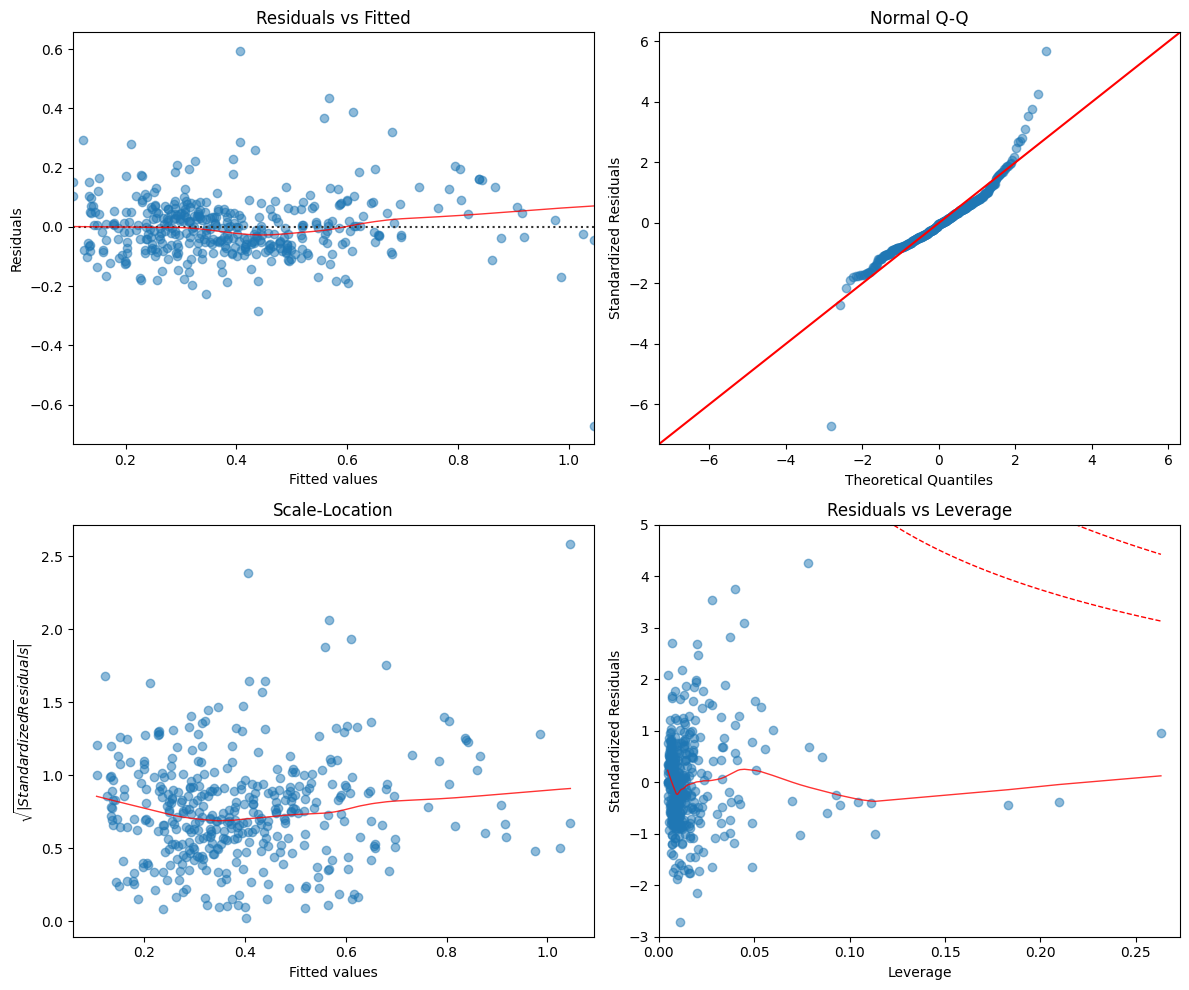

In [16]:
import sys
import os

# Menambahkan path ke folder yang berisi script2.py
sys.path.append(os.path.abspath('../my_package'))
from diagnosticPlot import diagnostic_plots
diagnostic_plots(train_data[["X1","X2_sq","X2","X2_sq","X3","X3_sq"]], train_data["Y"], model_fit=model_fit)

In [17]:
Y_pred_test = model_fit.predict(train_data[["X1","X2_sq","X2","X2_sq","X3","X3_sq"]])

In [18]:
residuals_test = train_data["Y"] - Y_pred_test

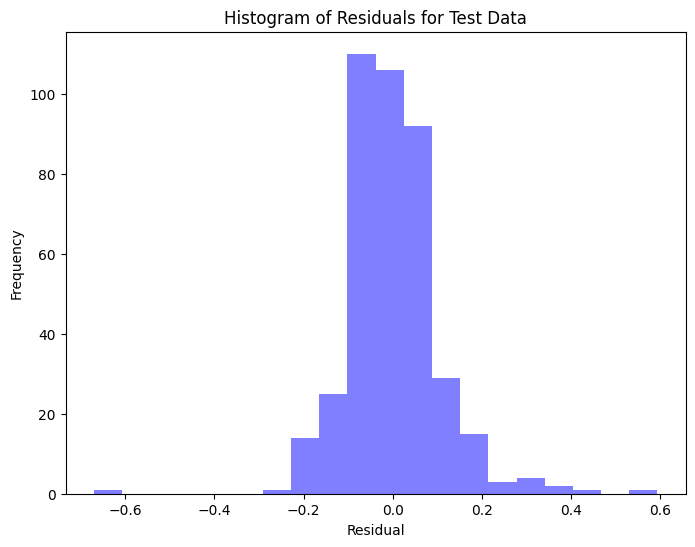

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(residuals_test, bins=20, color='blue', alpha=0.5)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Test Data')
plt.show()


In [20]:
from statsmodels.stats.anova import anova_lm
display(anova_lm(model_fit))

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,8.895310,8.895310,794.602395,8.660821e-97
"np.power(X1, 2)",1.0,1.573133,1.573133,140.525219,5.838694e-28
X2,1.0,0.446049,0.446049,39.844777,7.361798e-10
"np.power(X2, 2)",1.0,0.000910,0.000910,0.081308,7.756812e-01
X3,1.0,1.283121,1.283121,114.618935,1.141401e-23
"np.power(X3, 2)",1.0,0.688974,0.688974,61.544804,4.047998e-14
Residual,397.0,4.444283,0.011195,NaN,NaN
